In [214]:
import numpy as np
normal = np.random.multivariate_normal

In [215]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset creation

Let's create a sample of examples with two values x1 and x2, with two categories. 
For the first category, the underlying probability distribution is a 2D Gaussian centered on (0,0), with width sqrt(s2) = 1 along both directions. For the second category, the Gaussian is centered on (2,2).

In [216]:
s2 = 1
sample1 = normal([0.,0.], [[s2, 0.], [0.,s2]], 100)
sample2 = normal([2.,2.], [[s2, 0.], [0.,s2]], 100)
target1 = np.zeros((100,))
target2 = np.ones((100,))

Here is a scatter plot for the examples in the two categories

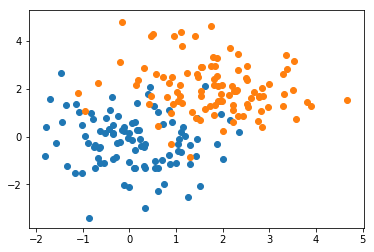

In [217]:
plt.scatter(sample1[:,0], sample1[:,1])
plt.scatter(sample2[:,0], sample2[:,1])

Our goal will be to classify (x,y) points in one of the two categories. To do that, we need to build a single sample containing the examples from the two categories. So we concatenate the arrays of points, and also the arrays of targets for later use:

In [250]:
x = np.concatenate((sample1, sample2))
y = np.concatenate((target1, target2))

## The sigmoid function 

The sigmoid or logistic function is essential in classification problems. In 1D, the sigmoid function is expressed as

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

and here is what it looks like:

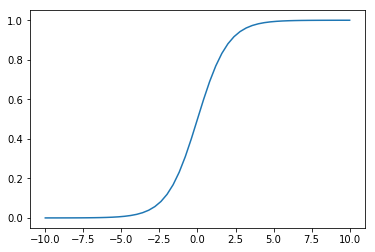

In [268]:
# define parameters
b = 0
w = 1

def sigmoid(x1):
    # z is a linear function of x1
    z = w*x1 + b
    return 1 / (1+np.exp(-z))

# create an array of evenly spaced values
linx = np.linspace(-10,10,51)
plt.plot(linx, sigmoid(linx))

Let's understand this function in more details:

* when x goes to infinity, $e^{-x}$ goes to zero, and $\sigma (x)$ goes to one.
* when x goes to minus infinity, $e^{-x}$ goes to infinity, and $\sigma (x)$ goes to zero.
* $\sigma(0) = 0.5$

It is important to note that the sigmoid is bound between 0 and 1, like a probability. And actually, in classification problems, the probability for an example to belong to a given category is produced by a sigmoid function.

Now go back to the cell above, and play a bit with the `b` and `w` parameters, redoing the plot everytime you change one of these parameters. 

* $b$ is the **bias**. Changing the bias simply moves the sigmoid along the horizontal axis. For example, if you choose $b=1$ and $w=0$, then $z = x + b$ takes a zero value at $x=-1$, and that's where the sigmoid will be equal to 0.5
* $w$ is the **weight** of variable $x$. If you increase it, the sigmoid evolves faster as a function of $x$ and gets sharper.

## Logistic regression

In [219]:
from sklearn.linear_model import LogisticRegression

In [220]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(x, y)

In [221]:
clf.predict_proba([[4,4]])

array([[4.88532860e-05, 9.99951147e-01]])

In [222]:
xmin, xmax, npoints = -5, 6, 100
gridx, gridy = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints))

In [223]:
grid = np.c_[gridx.ravel(), gridy.ravel()]

In [224]:
prob = clf.predict_proba(grid)

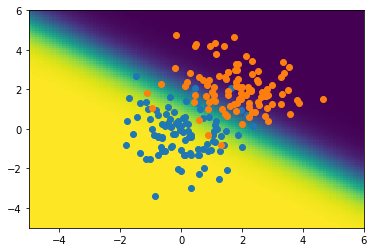

In [225]:
plt.pcolor(gridx,gridy,prob[:,0].reshape(npoints,npoints))
plt.scatter(sample1[:,0], sample1[:,1])
plt.scatter(sample2[:,0], sample2[:,1])

In [226]:
linx = np.linspace(-5,5,51)

## Sigmoid, 1D

In [227]:
b = 1
w = 2
z = w*x + b

In [228]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

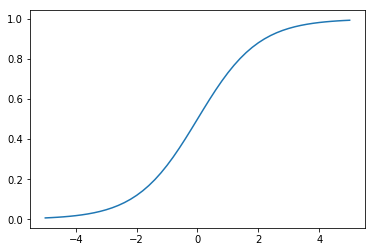

In [230]:
plt.plot(linx, sigmoid(linx))

## Sigmoid, 2D

Play with b, w1, w2 to get an optimal separation by eye between the two categories

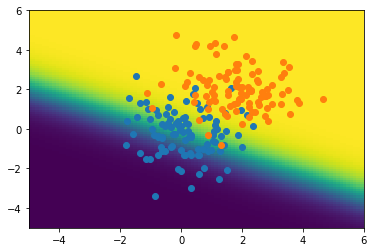

In [231]:
b = 1
w1, w2 = 1, 2
def sigmoid_2d(x1, x2):
    z = w1*x1 + w2*x2 + b
    return sigmoid(z)
prob = sigmoid_2d(gridx, gridy)
plt.pcolor(gridx,gridy,prob)
plt.scatter(sample1[:,0], sample1[:,1])
plt.scatter(sample2[:,0], sample2[:,1])

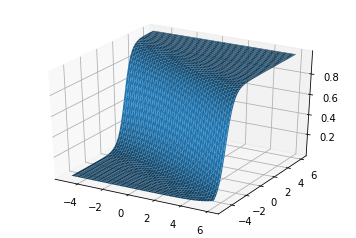

In [232]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(gridx, gridy, prob)

## Dumb neural net

In [233]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)

In [234]:
mlp.fit(x,y)

Iteration 1, loss = 0.62765947
Iteration 2, loss = 0.52756752
Iteration 3, loss = 0.43845764
Iteration 4, loss = 0.37788755
Iteration 5, loss = 0.34320576
Iteration 6, loss = 0.32556243
Iteration 7, loss = 0.31744587
Iteration 8, loss = 0.31395253
Iteration 9, loss = 0.31218237
Iteration 10, loss = 0.31052220
Iteration 11, loss = 0.30814531
Iteration 12, loss = 0.30470025
Iteration 13, loss = 0.30012166
Iteration 14, loss = 0.29451421
Iteration 15, loss = 0.28807966
Iteration 16, loss = 0.28106970
Iteration 17, loss = 0.27375415
Iteration 18, loss = 0.26639883
Iteration 19, loss = 0.25924931
Iteration 20, loss = 0.25251867
Iteration 21, loss = 0.24637812
Iteration 22, loss = 0.24095031
Iteration 23, loss = 0.23630538
Iteration 24, loss = 0.23246025
Iteration 25, loss = 0.22938176
Iteration 26, loss = 0.22699380
Iteration 27, loss = 0.22518810
Iteration 28, loss = 0.22383767
Iteration 29, loss = 0.22281127
Iteration 30, loss = 0.22198684
Iteration 31, loss = 0.22126204
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [236]:
prob_mlp = mlp.predict_proba(grid)

In [237]:
prob_mlp

array([[9.99999994e-01, 5.89548596e-09],
       [9.99999993e-01, 6.87044244e-09],
       [9.99999992e-01, 8.00663078e-09],
       ...,
       [1.13542667e-07, 9.99999886e-01],
       [9.74302914e-08, 9.99999903e-01],
       [8.36043569e-08, 9.99999916e-01]])

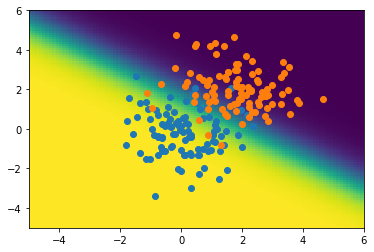

In [238]:
plt.pcolor(gridx,gridy,prob_mlp[:,0].reshape(npoints,npoints))
plt.scatter(sample1[:,0], sample1[:,1])
plt.scatter(sample2[:,0], sample2[:,1])

Iteration 1, loss = 0.68285478
Iteration 2, loss = 0.64462357
Iteration 3, loss = 0.60774282
Iteration 4, loss = 0.56913979
Iteration 5, loss = 0.52993034
Iteration 6, loss = 0.49161571
Iteration 7, loss = 0.45516185
Iteration 8, loss = 0.42144090
Iteration 9, loss = 0.39093432
Iteration 10, loss = 0.36364410
Iteration 11, loss = 0.33936615
Iteration 12, loss = 0.31795152
Iteration 13, loss = 0.29940047
Iteration 14, loss = 0.28377800
Iteration 15, loss = 0.27103764
Iteration 16, loss = 0.26090222
Iteration 17, loss = 0.25291917
Iteration 18, loss = 0.24662276
Iteration 19, loss = 0.24164026
Iteration 20, loss = 0.23771305
Iteration 21, loss = 0.23467716
Iteration 22, loss = 0.23242905
Iteration 23, loss = 0.23088784
Iteration 24, loss = 0.22996022
Iteration 25, loss = 0.22951220
Iteration 26, loss = 0.22935398
Iteration 27, loss = 0.22925111
Iteration 28, loss = 0.22897042
Iteration 29, loss = 0.22834763
Iteration 30, loss = 0.22734066
Iteration 31, loss = 0.22603221
Iteration 32, los

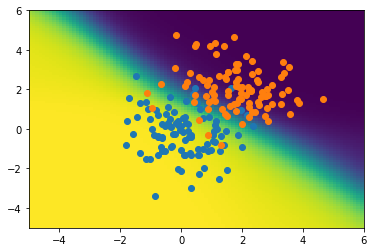

In [249]:
mlp2 = MLPClassifier(hidden_layer_sizes=(5), activation='logistic', alpha=1e-4,
                    solver='adam', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)
mlp2.fit(x,y)
prob_mlp2 = mlp2.predict_proba(grid)
plt.pcolor(gridx,gridy,prob_mlp2[:,0].reshape(npoints,npoints))
plt.scatter(sample1[:,0], sample1[:,1])
plt.scatter(sample2[:,0], sample2[:,1])